In [5]:
import os
import glob
from matplotlib import pyplot as plt
import re
import numpy as np

In [21]:
path = r'C:\Users\parkf\Desktop\summer2021\htcBasic2'

subjectList = []
ridgeVec = []
memVec = []
foldVec = []

for filename in glob.glob(os.path.join(path, '*.out')):
    parseThis = os.path.basename(filename)
    fileNum, parseThis = re.split('L|R|B', parseThis)
    memNum, parseThis = re.split('r', parseThis)
    memNum = re.split('p', memNum)[1]
    ridgeNum, parseThis = re.split('c', parseThis)
    foldNum = re.split('.o', parseThis)[0]
    if int(fileNum) not in subjectList:
        subjectList.append(int(fileNum))
    if int(memNum) not in memVec:
        memVec.append(int(memNum))
    if float(ridgeNum) not in ridgeVec:
        ridgeVec.append(float(ridgeNum))
    if int(foldNum) not in foldVec:
        foldVec.append(int(foldNum))

err = np.zeros((len(subjectList), len(memVec), len(ridgeVec), len(foldVec)))
for filename in glob.glob(os.path.join(path, '*.out')):
    parseThis = os.path.basename(filename)
    fileNum, parseThis = re.split('L|R|B', parseThis)
    memNum, parseThis = re.split('r', parseThis)
    memNum = re.split('p', memNum)[1]
    ridgeNum, parseThis = re.split('c', parseThis)
    foldNum = re.split('.o', parseThis)[0]
    f = open(filename,"r")
    error = (float(f.read()))
    err[subjectList.index(int(fileNum)), memVec.index(int(memNum)), ridgeVec.index(float(ridgeNum)), int(foldNum)] = error
      
            
errNoCv = np.mean(err,3)
    

In [22]:
print(subjectList)
print(memVec)
print(ridgeVec)

[282, 335, 439, 524]
[12, 16, 20, 24, 28, 4, 8]
[0.1, 0.5, 0.0, 10.0]


In [23]:
#print(errNoCv.shape)
#print(err.shape)
#print(err)
#print(errNoCv)

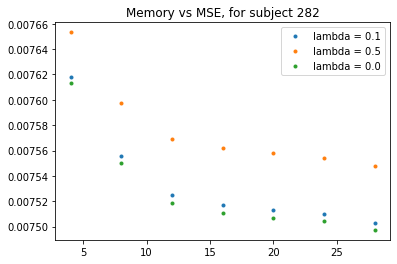

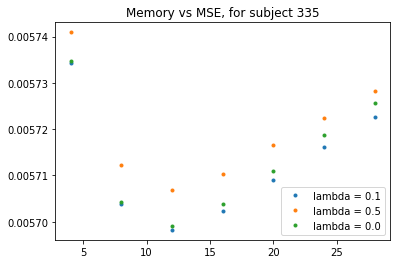

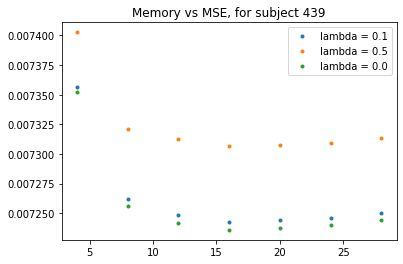

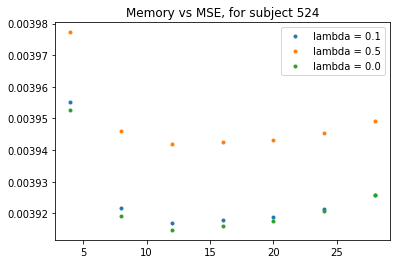

In [27]:
for n in range(len(subjectList)):
    titleString = f"Memory vs MSE, for subject {subjectList[n]}"
    plt.title(titleString)
    for i in range(len(ridgeVec)-1):
        plt.plot(memVec[:], errNoCv[n , :, i], ".", label = f"lambda = {ridgeVec[i]}") ## figure out columns to pass
    plt.legend()
    plt.show()

In [25]:
from scipy.io import loadmat
from scipy.linalg import svdvals

sys.path.insert(0, r"C:\Users\parkf\Desktop\summer2021\projectFilesGitManaged") #temporaraly add the path we need for function list to PATH
import functionList

In [31]:
# r value is residual sum of squares/total sum of squares,
# should be equivalent ot MSE/variance of data
path = r'C:\Users\parkf\Desktop\summer2021\eegData\displayStat'
#for filename in glob.glob(os.path.join(path, '*.mat')):
#    raw = loadmat(filename)
#    X = raw['data']
#    mask = raw['mask']
#    X = functionList.removeTrash(X,mask,4)
#    l = X.shape[0]
#    c = X.shape[1]
#    print(X.var())


for filename in glob.glob(os.path.join(path, '*.mat')):
    raw = loadmat(filename)
    X = raw['data']
    print('value of l', X.shape[0]) #l is what we scale lambda by in some of the runs
    mask = raw['mask']
    print(f'for file {filename}')
    xClean = functionList.removeTrash(X,mask,1)
    sVals = svdvals(xClean)
    #trace = np.trace(np.transpose(xClean)@xClean)
    #scaleSingular = trace*.001/sVals[0]
    #print(f'scale data mat by: {scaleSingular}')
    #print(f'data Singular Val: {sVals[0]}')
    for memNumber in [8]:
        featureMat = functionList.buildFeatureMat(X,memNumber)
        featureMat = functionList.removeTrash(featureMat,mask,memNumber)
        trace = np.trace(np.transpose(featureMat)@featureMat)
        #print(f'trace with scale: {trace*.0001}')
        #sVals = svdvals(featureMat)
        #print(f'singular value, {memNumber}: {sVals[0]}')
        scaleSingular = trace*.001/(sVals[0])
        print(f'scale singular value by: {scaleSingular}')


value of l 169870
for file C:\Users\parkf\Desktop\summer2021\eegData\displayStat\282L.mat
scale singular value by: 847.0708885070845
value of l 151499
for file C:\Users\parkf\Desktop\summer2021\eegData\displayStat\335B.mat
scale singular value by: 1975.0156359945822
value of l 156224
for file C:\Users\parkf\Desktop\summer2021\eegData\displayStat\439B.mat
scale singular value by: 3101.4424740553236
value of l 150976
for file C:\Users\parkf\Desktop\summer2021\eegData\displayStat\524R.mat
scale singular value by: 8111.824133083668
